In [ ]:
import copy
from copy import deepcopy
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D , LSTM, Attention
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import*
import random as random
import time
import matplotlib.pyplot as plt

import Seth
from Seth import fetch_seth, Devices, Floorplan, get_mac_ids

In [2]:
def train():
    # dfs is a list of dataframes
# meta is a dataframe with meta data

#getting train data
    train_fp, train_meta = fetch_seth(
    Devices.lg,
    Floorplan.OFFICE,
    ci = 0,
    base_path="temp/clean/"  # <-- this would be 'seth/temp/clean' from outside this dir
)
    train_fp = train_fp.sample(frac=1).reset_index(drop=True)
    train_aps = get_mac_ids(train_fp.columns)
    train_x = train_fp[train_aps].values
    train_x = (train_x + 100)/100
    train_y = (train_fp["label"]).values
    return train_x, train_y, train_aps

In [3]:
def test(itr, train_aps):
    #getting test data
    test_fp, test_meta = fetch_seth(
    Devices.lg ,
    Floorplan.OFFICE,
    ci = itr,
    base_path="temp/clean/"  # <-- this would be 'seth/temp/clean' from outside this dir
)
    test_aps = get_mac_ids(test_fp.columns)
    missing_aps = list(set(train_aps)-set(test_aps))
    test_fp[missing_aps] = -100
    test_x = test_fp[train_aps].values
    test_x = (test_x + 100)/100
    test_y = (test_fp["label"]).values
    return test_x, test_y


In [4]:
def mean_cal(group):
    for i in range (0, len(group)):
        if group[i] < 0:
            group[i] = -group [i]
    mean_diff = np.mean(group)
    return mean_diff

In [ ]:
train_x, train_y, train_aps = train()
input_shape = train_x.shape[1]
hid_1 = 190
hid_2 = 175
hid_3 = 150
output_shape = input_shape

In [ ]:
X = tf.placeholder(tf.float32, shape = [None, input_shape])
initializer = tf.variance_scaling_initializer()

In [ ]:
x = tf.keras.Input(shape=(input_shape,))
w1 = tf.Variable(initializer([input_shape, hid_1]), dtype = tf.float32)

In [5]:
train_x, train_y, train_aps = train()
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

error = []
mean_error = []
input_shape = train_x.shape[1] # input = 203
model = Sequential()
input = tf.keras.Input(shape=(input_shape,)) # enc = 190
encoded = Dense(190, activation='relu')(input)
decoded = Dense(input_shape, activation='softmax')(encoded) # recons = 203
autoencoder = Model(input,decoded)

opt = Adam(learning_rate=1e-4)

autoencoder.compile(loss=mse,
            optimizer=opt,
            metrics=['accuracy'])
            

autoencoder.fit(train_x, train_x,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/1000


2022-04-05 21:27:15.226232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-05 21:27:15.226320: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-05 21:27:15.275886: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-05 21:27:15.276081: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-05 21:27:15.379293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 21ms/step - loss: 0.0212 - accuracy: 0.0000e+00 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.0000e+00 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.0043 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.0209 - accuracy: 0.0000e+00

2022-04-05 21:27:15.579746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.0043 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.0043 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.0130 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.0261 - val_loss: 0.0213 - val_accuracy: 0.0172
Epoch 8/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.0391 - val_loss: 0.0213 - val_accuracy: 0.0517
Epoch 9/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.0304 - val_loss: 0.0213 - val_accuracy: 0.0517
Epoch 10/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.0217 - val_loss: 0.0213 - val_accuracy: 0.0517
Epoch 11/1000
8/8 [=

In [50]:
test_x, test_y = test(0, train_aps)
encoder = Model(input, encoded) # 190
encoder_out = tf.keras.Input(shape=(190,))
print(encoder_out.shape)
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoder_out,decoder_layer(encoder_out))
encoder_pred = encoder.predict(test_x)
predicted = autoencoder.predict(test_x)
#print(predicted[-1])
print("--------------------------------------------------------")
print(encoder_pred[-1])

(None, 190)
--------------------------------------------------------
[0.540834   0.8340281  1.024254   0.         0.48820215 0.
 0.7992665  0.         0.         1.0560961  0.         0.
 0.8805344  1.5265597  1.0839089  0.39389628 1.6085969  0.
 0.66948396 1.2062634  1.0133494  0.         0.         0.90433127
 1.3194907  1.4563856  0.         0.         0.         0.
 0.         0.         1.0871569  1.4382457  0.         0.
 0.8570258  0.         0.         0.         0.         0.
 1.4216552  1.4905491  0.98123884 0.         1.2540883  0.
 0.         1.4446062  1.2576029  0.7007289  0.19134507 0.
 0.         0.45303282 0.         1.0335766  1.2457099  1.1845181
 0.05678347 0.         1.496459   0.         0.23923859 1.5460613
 0.01695378 0.50859296 0.         0.         0.         0.02053707
 1.1585165  0.9428322  0.29777488 0.         0.59588146 0.
 0.         1.1584948  1.2401936  0.8713394  0.         0.
 1.2518647  0.         0.         0.9009605  0.         0.
 0.37106964 0.  

2022-04-06 00:03:32.573425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [29]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

input_shape = encoder_pred.shape[1] # 190
model = Sequential()
input_1 = tf.keras.Input(shape=(input_shape,))
encoded_1 = Dense(175, activation='relu')(input_1) # enc = 175
decoded_1 = Dense(input_shape, activation='softmax')(encoded_1) #out = 190
autoencoder_1 = Model(input_1,decoded_1)

opt = Adam(learning_rate=1e-4)

autoencoder_1.compile(loss=mse,
            optimizer=opt,
            metrics=['accuracy'])
            

autoencoder_1.fit(encoder_pred, encoder_pred,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)

Epoch 1/1000


2022-04-05 21:59:10.386626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 27ms/step - loss: 0.7286 - accuracy: 0.0000e+00 - val_loss: 0.7264 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7282 - accuracy: 0.0000e+00 - val_loss: 0.7260 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7278 - accuracy: 0.0000e+00 - val_loss: 0.7256 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7112 - accuracy: 0.0000e+00

2022-04-05 21:59:10.904075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 8ms/step - loss: 0.7273 - accuracy: 0.0043 - val_loss: 0.7252 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7269 - accuracy: 0.0043 - val_loss: 0.7248 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7265 - accuracy: 0.0043 - val_loss: 0.7243 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.7261 - accuracy: 0.0087 - val_loss: 0.7239 - val_accuracy: 0.0000e+00
Epoch 8/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7256 - accuracy: 0.0087 - val_loss: 0.7235 - val_accuracy: 0.0000e+00
Epoch 9/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7252 - accuracy: 0.0087 - val_loss: 0.7231 - val_accuracy: 0.0000e+00
Epoch 10/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.7248 - accuracy: 0.0087 - val_loss: 0.7227 - val_accuracy: 0.0000e+00
Epoc

In [56]:
encoder_1 = Model(input_1, encoded_1)
encoder_out_1 = tf.keras.Input(shape=(175,))
print(encoder_out_1.shape)
decoder_layer_1 = autoencoder_1.layers[-1]
decoder_1 = Model(encoder_out_1,decoder_layer_1(encoder_out_1))
encoder_pred_1 = encoder_1.predict(encoder_pred)
decoder_pred_1 = decoder_1.predict(encoder_pred_1)
print(encoder_pred_1.shape)

(None, 175)
(288, 175)


2022-04-06 00:05:29.067863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:05:29.127653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [60]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

input_shape = encoder_pred_1.shape[1] # 175
model = Sequential()
input_2 = tf.keras.Input(shape=(input_shape,))
encoded_2 = Dense(150, activation='relu')(input_2) # enc = 175
decoded_2 = Dense(input_shape, activation='sigmoid')(encoded_2)
autoencoder_2 = Model(input_2,decoded_2)

opt = Adam(learning_rate=1e-4)

autoencoder_2.compile(loss=mse,
            optimizer=opt,
            metrics=['accuracy'])
            

autoencoder_2.fit(encoder_pred_1, encoder_pred_1,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)

Epoch 1/1000
7/8 [=========================>....] - ETA: 0s - loss: 4.4550 - accuracy: 0.0000e+00

2022-04-06 00:10:37.936505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 30ms/step - loss: 4.4518 - accuracy: 0.0000e+00 - val_loss: 4.7221 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.1211 - accuracy: 0.0000e+00 - val_loss: 4.4870 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.8081 - accuracy: 0.0000e+00 - val_loss: 4.2679 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 3.4808 - accuracy: 0.0000e+00

2022-04-06 00:10:38.175671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 9ms/step - loss: 3.5208 - accuracy: 0.0000e+00 - val_loss: 4.0695 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2604 - accuracy: 0.0000e+00 - val_loss: 3.8892 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0188 - accuracy: 0.0217 - val_loss: 3.7249 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 14ms/step - loss: 2.7866 - accuracy: 0.0261 - val_loss: 3.5377 - val_accuracy: 0.0000e+00
Epoch 8/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.5607 - accuracy: 0.0261 - val_loss: 3.3943 - val_accuracy: 0.0000e+00
Epoch 9/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.3720 - accuracy: 0.0174 - val_loss: 3.2580 - val_accuracy: 0.0000e+00
Epoch 10/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.2215 - accuracy: 0.0217 - val_loss: 3.1588 - val_accuracy: 0.0000

In [66]:
encoder_2 = Model(input_2, encoded_2)
encoder_out_2 = tf.keras.Input(shape=(150,))
print(encoder_out_2.shape)
decoder_layer_2 = autoencoder_2.layers[-1]
decoder_2 = Model(encoder_out_2,decoder_layer_2(encoder_out_2))
encoder_pred_2 = encoder_2.predict(encoder_pred_1)
decoder_pred_2 = decoder_2.predict(encoder_pred_2)
print(encoder_pred_2.shape)

(None, 150)
(288, 150)


2022-04-06 00:15:02.569284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-06 00:15:02.612255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [70]:

num_classes = 48
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

error = []
mean_error = []

model = Sequential()
model.add(Flatten(input_dim=encoder_pred_2.shape[1]))
model.add(Dense(190, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(203, activation='sigmoid'))

# model.summary()

opt = Adam(learning_rate=1e-4)

model.compile(loss=sparse_categorical_crossentropy,
            optimizer=opt,
            metrics=['accuracy'])
            

model.fit(encoder_pred_2, train_y,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)


Epoch 1/1000
8/8 [==============================] - ETA: 0s - loss: 7.3059 - accuracy: 0.0087    

2022-04-06 00:20:49.035315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 24ms/step - loss: 7.3059 - accuracy: 0.0087 - val_loss: 6.6636 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.8999 - accuracy: 0.0043 - val_loss: 6.3168 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 6.4876 - accuracy: 0.0000e+00 - val_loss: 6.0214 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 6.3452 - accuracy: 0.0312

2022-04-06 00:20:49.247265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 7ms/step - loss: 6.2647 - accuracy: 0.0043 - val_loss: 5.7827 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.9099 - accuracy: 0.0087 - val_loss: 5.5855 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.5922 - accuracy: 0.0174 - val_loss: 5.4249 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.4896 - accuracy: 0.0043 - val_loss: 5.2877 - val_accuracy: 0.0172
Epoch 8/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.1642 - accuracy: 0.0391 - val_loss: 5.1869 - val_accuracy: 0.0172
Epoch 9/1000
8/8 [==============================] - 0s 6ms/step - loss: 5.0675 - accuracy: 0.0304 - val_loss: 5.0984 - val_accuracy: 0.0172
Epoch 10/1000
8/8 [==============================] - 0s 6ms/step - loss: 4.9144 - accuracy: 0.0217 - val_loss: 5.0237 - val_accuracy: 0.0172
Epoch 11/1000
8/8 [=

In [75]:

encoder_pred_3 = model.predict(encoder_pred_2)
print(encoder_pred_3.shape)

(288, 203)


In [76]:

num_classes = 48
callbacks = [tf.keras.callbacks.EarlyStopping(patience=300)]

error = []
mean_error = []

model = Sequential()
model.add(Flatten(input_dim=encoder_pred_3.shape[1]))
model.add(Dense(190, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='sigmoid'))

# model.summary()

opt = Adam(learning_rate=1e-4)

model.compile(loss=mse,
            optimizer=opt,
            metrics=['accuracy'])
            

model.fit(train_x, train_y,
        epochs=1000,
        callbacks = callbacks,
        validation_split = 0.2,
        verbose=1)


Epoch 1/1000
1/8 [==>...........................] - ETA: 1s - loss: 688.9341 - accuracy: 0.0000e+00

2022-04-06 00:23:53.665955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 27ms/step - loss: 718.3765 - accuracy: 0.0087 - val_loss: 731.2963 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 718.1260 - accuracy: 0.0087 - val_loss: 731.0303 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 717.8615 - accuracy: 0.0087 - val_loss: 730.7620 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 932.7886 - accuracy: 0.0000e+00

2022-04-06 00:23:53.984618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 9ms/step - loss: 717.5997 - accuracy: 0.0130 - val_loss: 730.4829 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 717.3013 - accuracy: 0.0087 - val_loss: 730.1812 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 717.0164 - accuracy: 0.0087 - val_loss: 729.8476 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 716.6642 - accuracy: 0.0043 - val_loss: 729.4739 - val_accuracy: 0.0000e+00
Epoch 8/1000
8/8 [==============================] - 0s 8ms/step - loss: 716.2774 - accuracy: 0.0174 - val_loss: 729.0575 - val_accuracy: 0.0000e+00
Epoch 9/1000
8/8 [==============================] - 0s 8ms/step - loss: 715.8488 - accuracy: 0.0043 - val_loss: 728.6053 - val_accuracy: 0.0000e+00
Epoch 10/1000
8/8 [==============================] - 0s 8ms/step - loss: 715.3876 - accuracy: 0.0000e+00 - val_loss: 728.0880

In [78]:
pred = model.predict(test_x)
print(pred)
print(test_x)

[[0.9999999  1.         0.9999999  ... 0.9999999  0.9999999  0.9999999 ]
 [0.9999999  1.         0.9999999  ... 0.9999999  0.9999999  0.9999999 ]
 [0.9999995  0.9999999  0.9999994  ... 0.9999994  0.9999995  0.9999993 ]
 ...
 [0.9999989  0.9999995  0.9999988  ... 0.99999845 0.99999905 0.99999845]
 [0.9999982  0.99999917 0.9999981  ... 0.99999774 0.9999987  0.99999774]
 [0.9999981  0.99999905 0.99999774 ... 0.99999726 0.99999845 0.9999975 ]]
[[0.43 0.36 0.36 ... 0.   0.   0.  ]
 [0.44 0.35 0.35 ... 0.   0.   0.  ]
 [0.43 0.35 0.36 ... 0.   0.   0.  ]
 ...
 [0.   0.2  0.21 ... 0.   0.17 0.17]
 [0.   0.2  0.2  ... 0.   0.16 0.16]
 [0.   0.2  0.21 ... 0.   0.16 0.16]]


In [33]:
print(decoder_pred_1.shape)
print(encoder_pred_1.shape)
print(train_x.shape)

print("--------------------------------------------------------")
print(decoder_pred_1)
print("--------------------------------------------------------")
print(encoder_pred_1)
print("--------------------------------------------------------")
print(train_x)

(288, 190)
(288, 175)
(288, 203)
--------------------------------------------------------
[[2.90186131e-06 3.56808164e-06 1.82074461e-06 ... 2.24494968e-07
  2.40817573e-03 2.98433172e-08]
 [1.29319430e-10 6.14398532e-10 1.54936952e-10 ... 1.28391004e-12
  2.83048674e-02 1.46113021e-13]
 [3.70697563e-07 4.14744903e-07 1.94478559e-07 ... 4.93595316e-08
  8.49299340e-06 5.83797677e-09]
 ...
 [9.23619609e-07 1.16722913e-06 5.47247282e-07 ... 8.01936082e-08
  3.76926240e-04 8.53543458e-09]
 [6.71847189e-10 2.60531996e-09 7.18583637e-10 ... 9.06608469e-12
  3.31667587e-02 1.21197312e-12]
 [5.86920179e-10 8.37608094e-10 6.20943130e-10 ... 3.59571317e-10
  3.90808566e-12 1.14889695e-10]]
--------------------------------------------------------
[[2.41836   2.3655117 3.186556  ... 0.        1.2092355 0.       ]
 [2.7591958 3.0894067 2.2869277 ... 0.        4.531598  0.       ]
 [2.4274325 2.0368621 3.411276  ... 0.        0.8674271 0.       ]
 ...
 [2.5994227 2.3356426 3.3939018 ... 0.        1

In [ ]:
test_df = test(dev_list[0], flp_list[0])
mean_error = mean(test_df, path)

(61, 209)
0
(61, 209) LG
(61, 209)
0
(61, 209) LG


2022-04-04 14:27:47.886832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(61, 175)
34
(61, 209) BLU
(61, 196)
16
(61, 209) HTC
(61, 186)
25
(61, 209) MOTO
(61, 196)
15
(61, 209) S7
(61, 168)
41
(61, 209) OP3
mean_error: [[17.360290264759605, 17.360290264759605, 17.360290264759605, 17.360290264759605, 17.360290264759605, 17.360290264759605]]


In [ ]:
import seaborn as sb

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


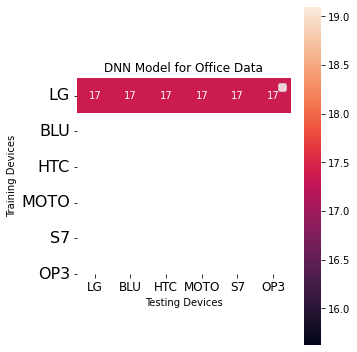

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
x_axis_labels = ['LG','BLU','HTC','MOTO','S7','OP3'] # labels for x-axis
y_axis_labels = ['LG','BLU','HTC','MOTO','S7','OP3'] # labels for y-axis
sb.heatmap(mean_error, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True, square=True, ax=ax)
plt.title("DNN Model for Office Data")
plt.xlabel('Testing Devices',)
plt.ylabel('Training Devices',)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.legend()
plt.tight_layout()
#plt.savefig("DNN_heatmap_office.png")
plt.show()